---
format:
    html:
        embed-resources: true
---

# Visual EDA 

Write either a function, or a class, that performs exploratory data analysis (EDA) on a given CSV file.

Run the function on both of your cleaned CSV files that you created from your job description crawl. 

- Explore feature distributions and relationships
- Uncover trends, patterns, and correlations
- Consider incorporating a geo-spatial analysis where appropriate
  - Folium is a great tool for this: https://realpython.com/python-folium-web-maps-from-data/ 
- Visualize data effectively
- Make sure your results are highly visual with high quality plots.

By focusing on these steps, you'll extract valuable insights and inform deeper analysis of your job descriptions dataset.

Below are some possible things to focus on, you can add more on top of these, and you don't have to do all of them, but aim to produce the highest quality results possible. 

Focus on a few cases that are most interesting to you, the points below are just ideas, there isn't anything specifically that you "need to do", the only thing you need to do is **take the assignment seriously, think critically, and make a high quality professional demonstration of EDA as applied to this dataset**

### **Univariate Analysis (Single Feature)**
- **Frequency Counts**: For categorical features (e.g., job title, sector, job type), visualize frequency distribution (bar charts).
- **Salary Distribution**: Analyze the range and spread of salary data (histograms, box plots).
- **Job Posting Dates**: Plot distribution of job posting dates to find trends over time (time series plots).
- **Experience Level Distribution**: Explore the spread of entry-level, mid-level, and senior-level roles.
- **Location Distribution**: Map the distribution of jobs across different cities, states, or countries.
- **Job Type Analysis**: Count of job types (full-time, part-time, contract) and their proportions.
- **Job Description Length**: Analyze job description lengths by word or character count.

### **Bivariate Analysis (Two Features)**
- **Salary vs. Experience Level**: Explore how salary varies by experience level (box plot or scatter plot).
- **Salary vs. Job Type**: Analyze differences in salary based on job types (full-time, part-time, contract).
- **Salary vs. Location**: Check how salaries vary across different locations.
- **Job Title vs. Sector/Industry**: Look at the relationship between job titles and the industries they belong to.
- **Job Title vs. Skills/Technologies**: Explore which job titles require specific skills.
- **Company Size vs. Salary**: Compare salaries across different company sizes (small, medium, large).
- **Remote Work vs. Salary**: Analyze if remote jobs offer higher or lower salaries compared to on-site jobs.

### **Multivariate Analysis (Multiple Features)**
- **Experience Level vs. Salary vs. Location**: Analyze how salary and experience vary across locations (3D scatter plot or heatmap).
- **Job Type vs. Experience Level vs. Sector**: Explore trends across job types, experience levels, and sectors (grouped bar plots).
- **Skills vs. Salary vs. Experience**: Check if certain skills demand higher salaries at different experience levels.
- **Salary vs. Sector vs. Company Size**: Compare salary ranges across sectors and company sizes.

### **Text Analysis and Feature Engineering**
- **Keyword Frequency**: Extract and analyze the most common keywords from job descriptions and required skills.
- **Text Length Analysis**: Look at the distribution of text lengths in job descriptions to identify patterns in verbosity.
- **NLP for Job Titles**: Group similar job titles by extracting key terms using Natural Language Processing (e.g., clustering similar roles).
- **Sentiment Analysis**: Perform sentiment analysis on company values or job descriptions to gauge company culture.
- **Named Entity Recognition (NER)**: Extract entities like company names, technologies, and locations from the text data.
- **Topic Modeling**: Identify topics or themes within job descriptions using topic modeling techniques like LDA (Latent Dirichlet Allocation).

### **Date and Time Analysis**
- **Job Posting Frequency Over Time**: Check trends in job postings over time (monthly, weekly).
- **Application Deadline vs. Posting Date**: Analyze how much time is typically given for application submissions.
- **Job Posting Expiry Analysis**: Explore how long jobs remain posted before expiring.
- **Seasonality**: Identify seasonal hiring trends by analyzing the distribution of job postings by month or quarter.

### **Geospatial Analysis**
- **Heatmap of Job Locations**: Visualize job density by location (city, state, country) on a map.
- **Salary by Geographic Region**: Compare average salaries across different geographic regions (e.g., East Coast vs. West Coast).
- **Remote Work Proportion by Location**: Analyze how remote job opportunities vary across regions.

### **Categorical Feature Exploration**
- **Sector/Industry Breakdown**: Analyze the distribution of jobs across different sectors or industries.
- **Certifications Breakdown**: Explore which certifications are most commonly required or preferred.
- **Company Size Distribution**: Look at the distribution of small, medium, and large companies in the dataset.
- **Job Platform Analysis**: Check how job postings differ across various job platforms (e.g., LinkedIn, Indeed).
- **Visa Sponsorship Availability**: Explore how often visa sponsorship is offered across job types or industries.

### **Correlations and Associations**
- **Correlation Matrix**: Compute correlations between numerical features (e.g., salary, years of experience) to find relationships.
- **Crosstab Analysis**: Perform crosstab analysis for categorical features (e.g., job type and location).
- **Feature Importance**: Use machine learning models (e.g., Random Forest) to evaluate feature importance for predicting salary or job title.

### **Clustering and Segmentation**
- **Job Title Clustering**: Cluster similar job titles using text similarity or clustering algorithms (e.g., k-means).
- **Salary Segmentation**: Group job listings into salary tiers (low, medium, high) for further analysis.
- **Geographic Segmentation**: Segment job listings based on location proximity or geographic region.

### **Dimensionality Reduction**
- **PCA**: Perform PCA to reduce the dimensionality of the data and visualize in 2D. 
- **t-SNE**: Perform t-SNE to reduce the dimensionality of the data and visualize in 2D. 

### **Patterns and Trends**
- **Trends in Job Types**: Analyze how the proportions of full-time, part-time, and contract jobs have changed over time.
- **Emerging Technologies**: Track trends in the demand for specific technologies or skills over time.
- **Sector Growth**: Identify growing or shrinking industries based on the number of job postings over time.
- **Benefits and Perks Trends**: Analyze which benefits (e.g., remote work, stock options) are becoming more or less common.



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
df = pd.read_csv("/Users/zp/hw-3-zp199717/data/processed-jobs-1.csv")
df.head(10)

,Job Title,Roles,Company Name,Sector/Industry,Location,City,State,Job Type,Salary,Experience Level,Education Requirements,Skills/Technologies Required,Job Responsibilities/Duties,Required Years of Experience,Remote Work Options,Job Description Length,Certifications Required or Preferred,Visa Sponsorship Availability,Working Hours/Shift Type
0,Technical Solutions Specialist,Specialist,Figure Eight Federal,Government,United States,Not Specified,Not Specified,Not Specified,124800.0,Not Specified,Bachelor,Machine Learning,Artificial Intelligence (AI) is transforming g...,0,On-site,3738,not required,no,not mentioned
1,AI API specialist to integrate TypingMind into...,Specialist,Upwork,Other,Anywhere,Not Specified,Not Specified,Not Specified,124800.0,Not Specified,Not Specified,Not Specified,i have purchased and API code and such from Ty...,0,not mentioned,379,not required,yes,not mentioned
2,"Solutions Architect, Generative AI Specialist",Specialist,2100 NVIDIA USA,Technology,United States,Not Specified,Not Specified,Not Specified,106729.5,Senior-Level,Not Specified,"Python, Machine Learning",Do you want to be part of the team that brings...,5,not mentioned,5140,not required,yes,not mentioned
3,"Machine Learning Specialist, Trilogy (Remote)",Specialist,Crossover,Other,Anywhere,Not Specified,Not Specified,Not Specified,106729.5,Senior-Level,Master,"Python, Machine Learning",Ready to leverage your mastery of LLMs to driv...,3,not mentioned,2786,not required,yes,not mentioned
4,Expert AI/Machine Learning Specialist Needed,Specialist,Upwork,Other,Anywhere,Not Specified,Not Specified,Not Specified,106729.5,Senior-Level,Not Specified,Machine Learning,We are seeking a highly rated expert in AI and...,0,not mentioned,480,not required,yes,not mentioned
5,AI and Information Security Analyst,others,RAND,Government,United States,Not Specified,Not Specified,Not Specified,192100.0,Senior-Level,Master,"Python, R, Machine Learning, Java","RAND's Meselson Center, part of the Global and...",10,Remote,7433,not required,no,not mentioned
6,AI Language Specialist,Specialist,Outlier,Other,"Air Force Academy, CO",Air Force Academy,CO,Not Specified,31200.0,Not Specified,Not Specified,Not Specified,Outlier is seeking skilled writers proficient ...,0,Remote,1073,not required,yes,Flexible
7,"HPC/AI Sales Specialist, Federal",Specialist,HPE,Other,California,Not Specified,Not Specified,Contract,139700.0,Mid-Level,Bachelor,Not Specified,"HPC/AI Sales Specialist, Federal\n\nThis role ...",4,Remote,7804,not required,no,not mentioned
8,AI specialist to setup make.com scenarios to p...,Specialist,Upwork,Other,Anywhere,Not Specified,Not Specified,Not Specified,124800.0,Not Specified,Not Specified,Not Specified,"Hello Upworkers,\n\nWe are seeking a Make.com ...",0,not mentioned,547,not required,yes,not mentioned
9,PPM Data Scientist/Statistician I,Statistician,ProSidian Consulting,Energy,"Boulder, CO",Boulder,CO,Contract,37440.0,Senior-Level,Bachelor,"Python, SQL, R",Company Description\n\nProSidian is a Manageme...,2,not mentioned,13393,not required,no,Flexible


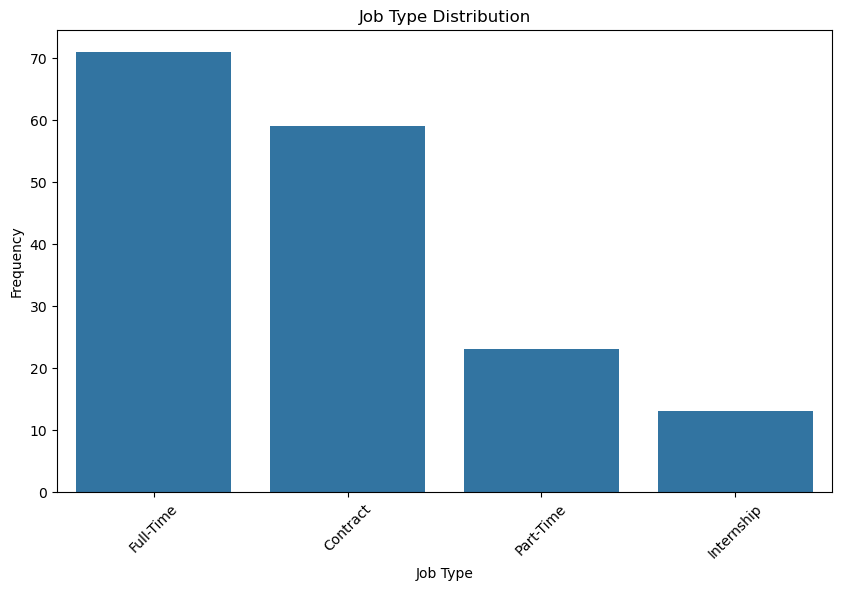

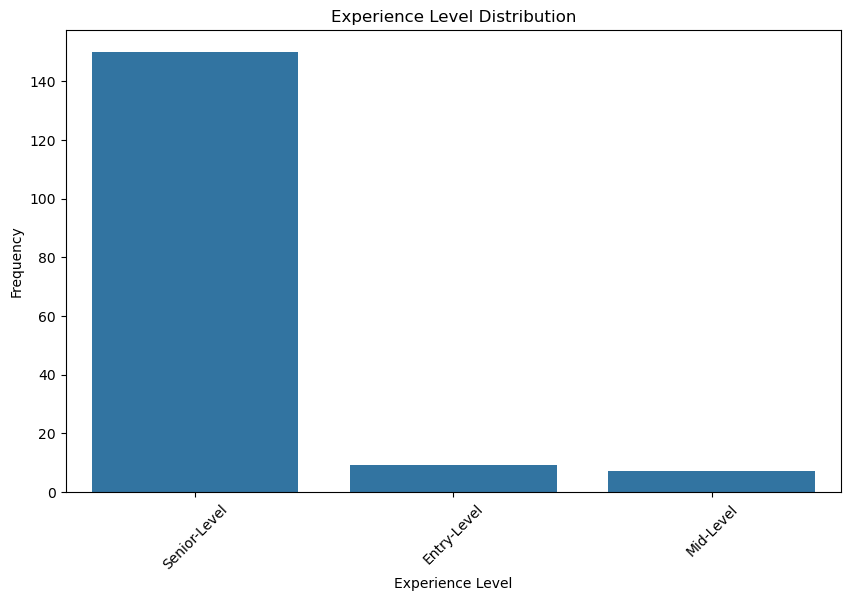

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

univariate_df = df[
    (df['Salary'] != 'Not Specified') & 
    (df['Experience Level'] != 'Not Specified') & 
    (df['Job Type'] != 'Not Specified')
]

# Univariate Analysis -  histogram of Job Type
plt.figure(figsize=(10, 6))
sns.countplot(data= univariate_df, x='Job Type', order=univariate_df['Job Type'].value_counts().index)
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Univariate Analysis -  histogram of Experience Level
plt.figure(figsize=(10, 6))
sns.countplot(data=univariate_df, x='Experience Level', order=univariate_df['Experience Level'].value_counts().index)
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


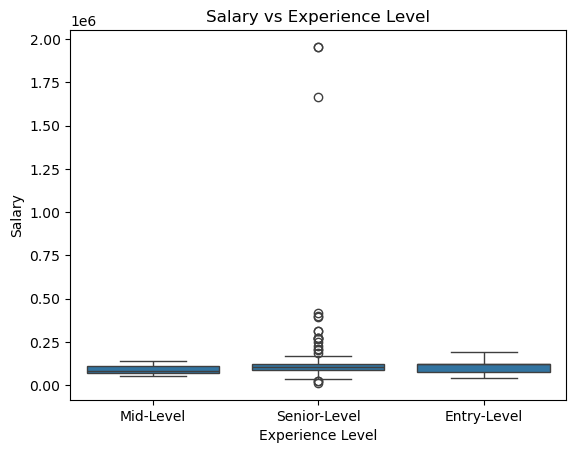

In [3]:
#bivariate : salary vs experience level
plt.figure()
sns.boxplot(data=univariate_df, x='Experience Level', y='Salary')
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()


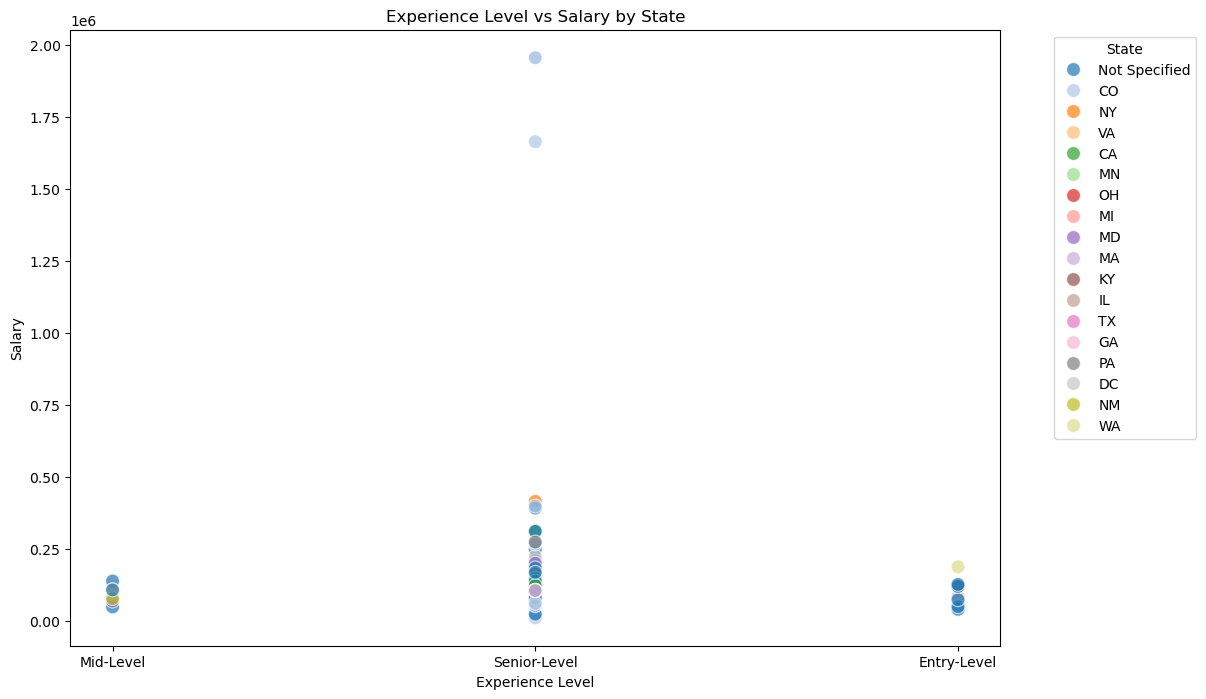

In [5]:
#multivariate: experience vs salary by state
plt.figure(figsize=(12, 8))
sns.scatterplot(data = univariate_df, x='Experience Level', y='Salary', hue='State', palette='tab20', s=100, alpha=0.7)


plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Experience Level vs Salary by State')


plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



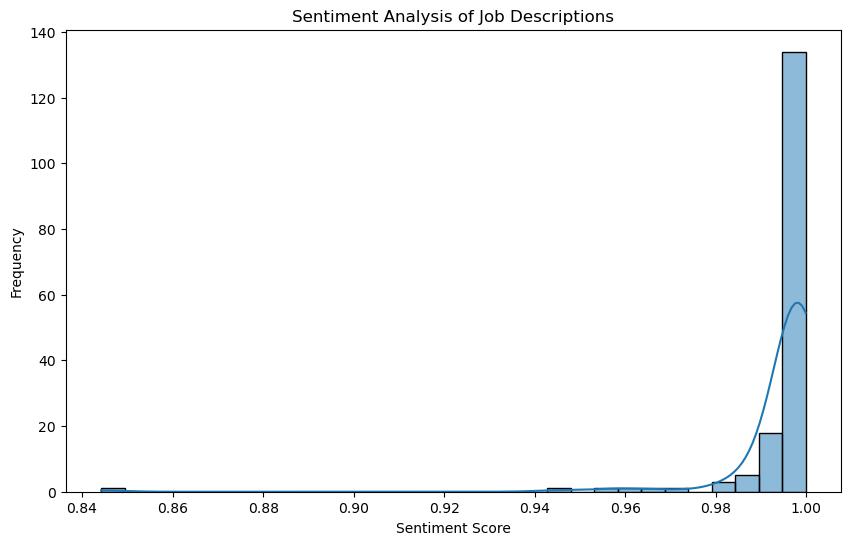

In [23]:
#text analysis 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

text_df = univariate_df 


sia = SentimentIntensityAnalyzer()

text_df['Scores'] = text_df['Job Responsibilities/Duties'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

plt.figure(figsize=(10, 6))
sns.histplot(text_df['Scores'], kde=True, bins=30)
plt.title('Sentiment Analysis of Job Descriptions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


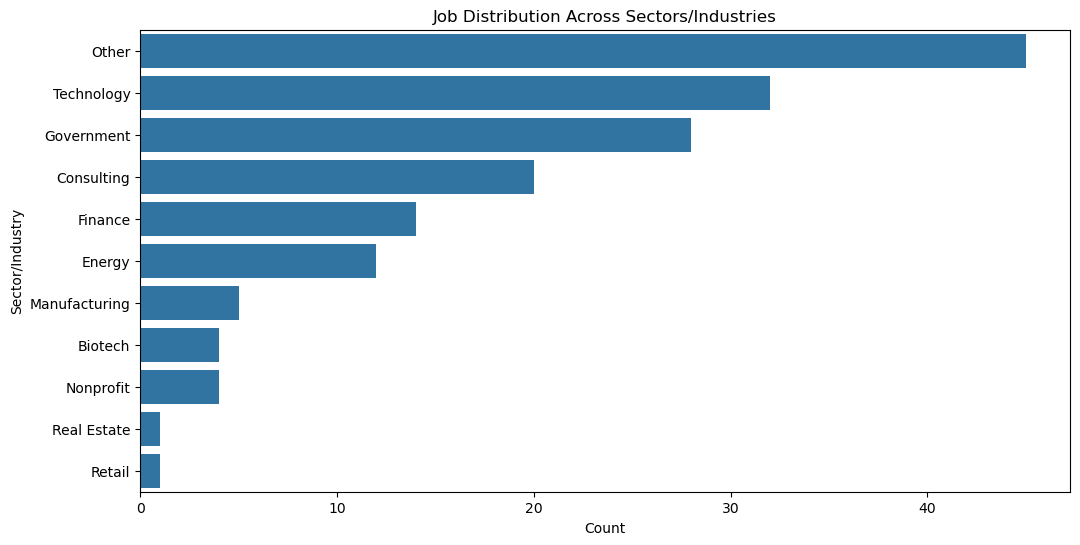

In [12]:
#categorical analysis 
#**Sector/Industry Breakdown**: Analyze the distribution of jobs across different sectors or industries.
#sectors were chosen by me, and if it doesn't contain sector that i chose, it is others

cat_df = univariate_df
cat_df["Sector/Industry"].unique()
plt.figure(figsize=(12, 6))
sns.countplot(data= cat_df, y='Sector/Industry', order=cat_df['Sector/Industry'].value_counts().index)
plt.title('Job Distribution Across Sectors/Industries')
plt.xlabel('Count')
plt.ylabel('Sector/Industry')
plt.show()





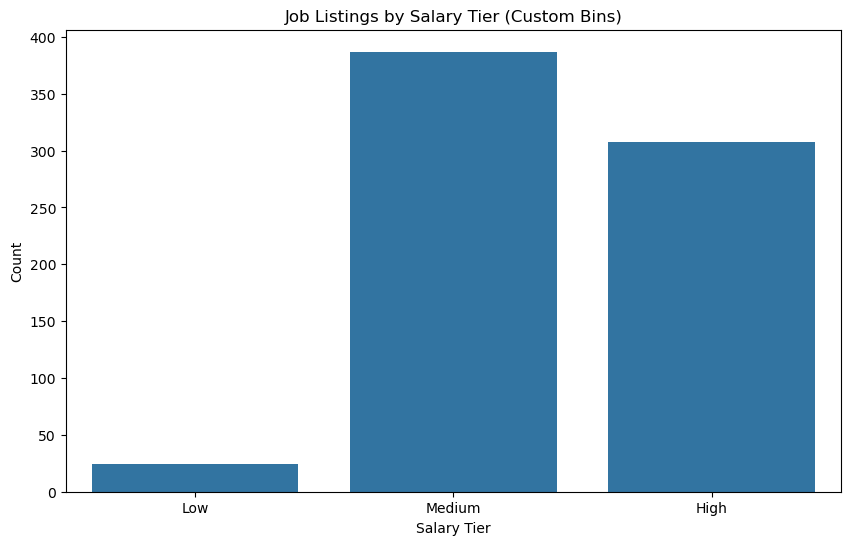

In [22]:
#clustering analysis- Group job listings into salary tiers (low, medium, high) for further analysis.
# gor group, 0-50,000(usd) = low, 50,000-120,000(usd) = medium, 120,000(usd) or higher = high
cluster_df = df
cluster_df['Salary Tier'] = pd.cut(cluster_df['Salary'], 
                                         bins=[0, 50000, 120000, float('inf')], 
                                         labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.countplot(data=cluster_df, x='Salary Tier', order=['Low', 'Medium', 'High'])
plt.title('Job Listings by Salary Tier (Custom Bins)')
plt.xlabel('Salary Tier')
plt.ylabel('Count')
plt.show()



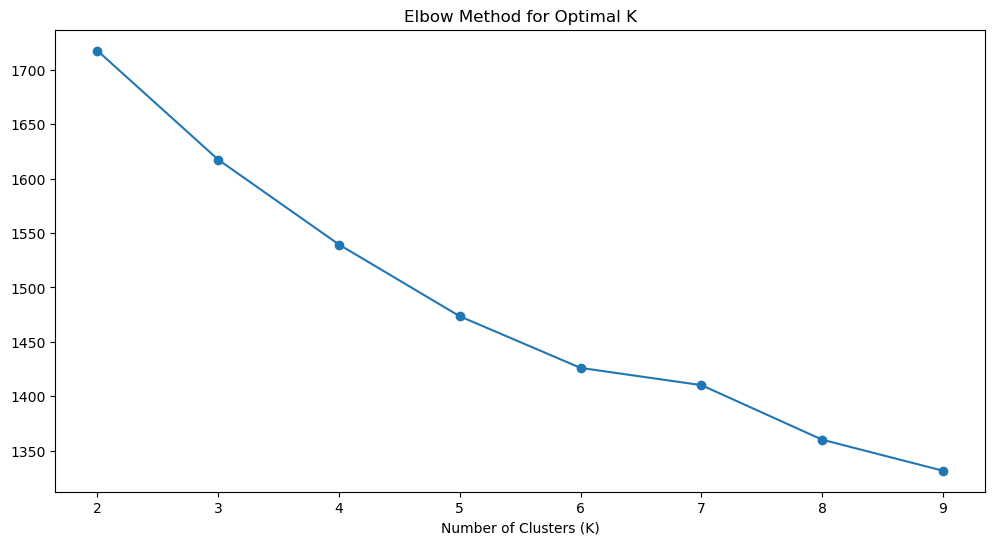

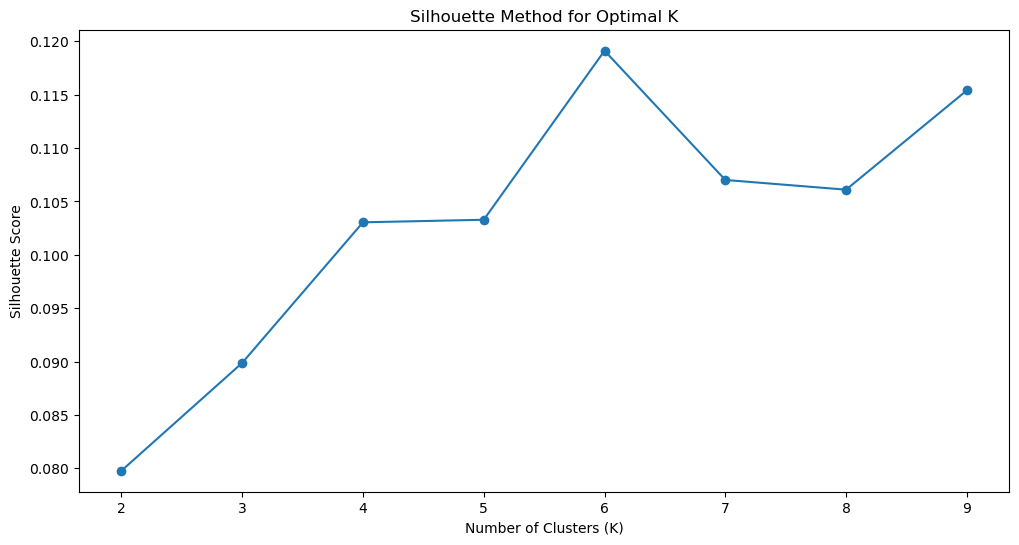

/var/folders/h9/km0tr_g527jd0vmrgtmb46g00000gn/T/ipykernel_11922/1985855413.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df['Cluster'] = kmeans_optimal.fit_predict(job_title_counts)


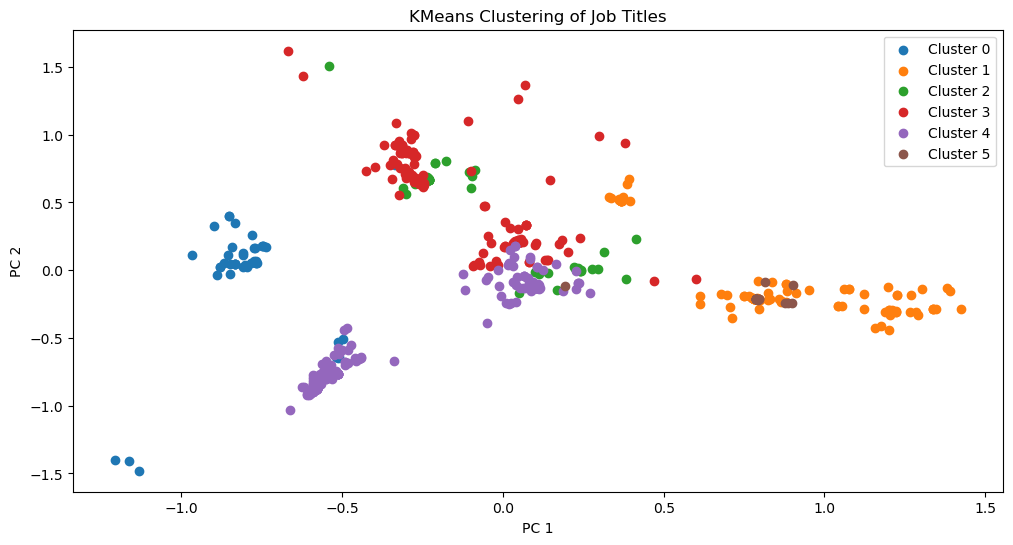

In [35]:
#kmeans clustering with dimension reduction using pca
#Job Title Clustering**: Cluster similar job titles using text similarity or clustering algorithms (e.g., k-means).
# optimal K chosen is 6
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



kmeans_df = df[df['Sector/Industry'] != 'Other']

count_vectorizer = CountVectorizer(stop_words='english')
job_title_counts = count_vectorizer.fit_transform(kmeans_df['Job Title'])

ks = [] 
silhouette_scores = []  
K = range(2, 10)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(job_title_counts)
    ks.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(job_title_counts, kmeans.labels_))

# Plotting the Elbow method results
plt.figure(figsize=(12, 6))
plt.plot(K, ks, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()
kmeans_optimal = KMeans(n_clusters=6)
kmeans_df['Cluster'] = kmeans_optimal.fit_predict(job_title_counts)


pca = PCA(n_components=2, random_state=42)
job_title_pca = pca.fit_transform(job_title_counts.toarray())


plt.figure(figsize=(12,6))
for cluster in range(6):
    plt.scatter(
        job_title_pca[kmeans_df['Cluster'] == cluster, 0], 
        job_title_pca[kmeans_df['Cluster'] == cluster, 1],
        
        label=f'Cluster {cluster}'
    )

plt.title('KMeans Clustering of Job Titles')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()